In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# Further Regression Considerations

- Collinearity
- Cleaning and Preparing Data
- Test Train Split for Assessment


### Collinearity

The notion of independence of variables is related to the notion of collinearity.  Briefly, we find collinearity anytime we find strong relationships between dependent variables.  As we saw earlier, the relationship between `newspaper` and other mediums were interrelated to one another.  This can be detected by looking both at plots of the variables themselves against one another, examining the correlation coefficients of variables, and calculating the Variance in Frequency measure for the different features.

In [2]:
credit = pd.read_csv('data/credit.csv')
ads = pd.read_csv('data/ads.csv', index_col = 'Unnamed: 0')

<IPython.core.display.Javascript object>


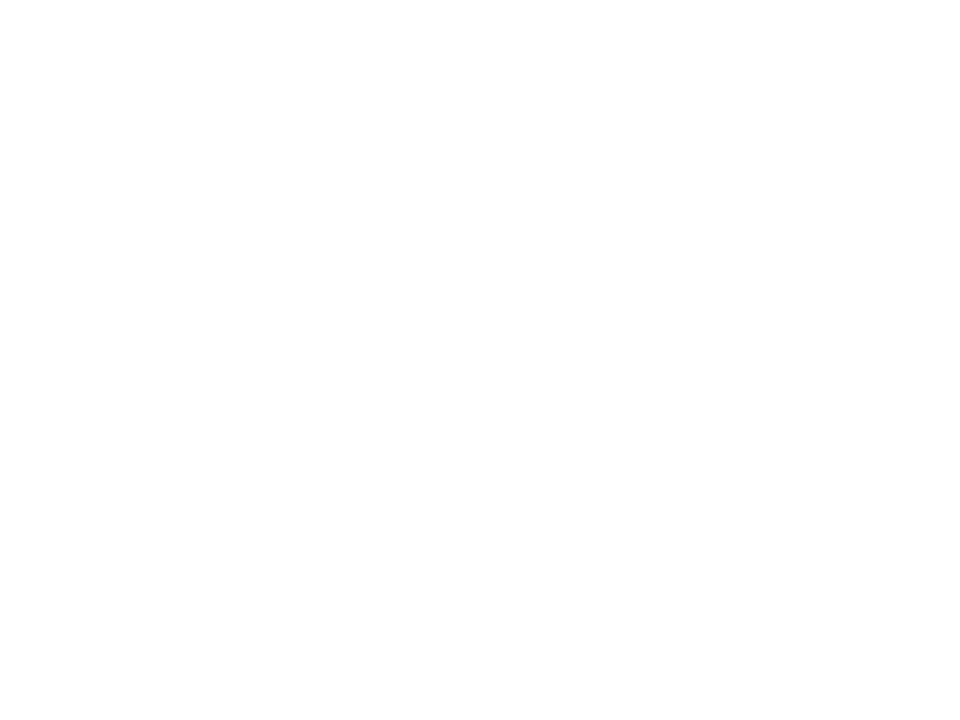

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(credit);

Note the relationships between `Limit, Rating`, and `Balance`.  Both `Limit` and `Rating` seem to be related to `Balance`, however they are strongly related to one another.  This is not to be confused with the relationships between `TV` and `radio` that we saw earlier.  We can see this clearly by comparing the variables to one another side by side.

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>


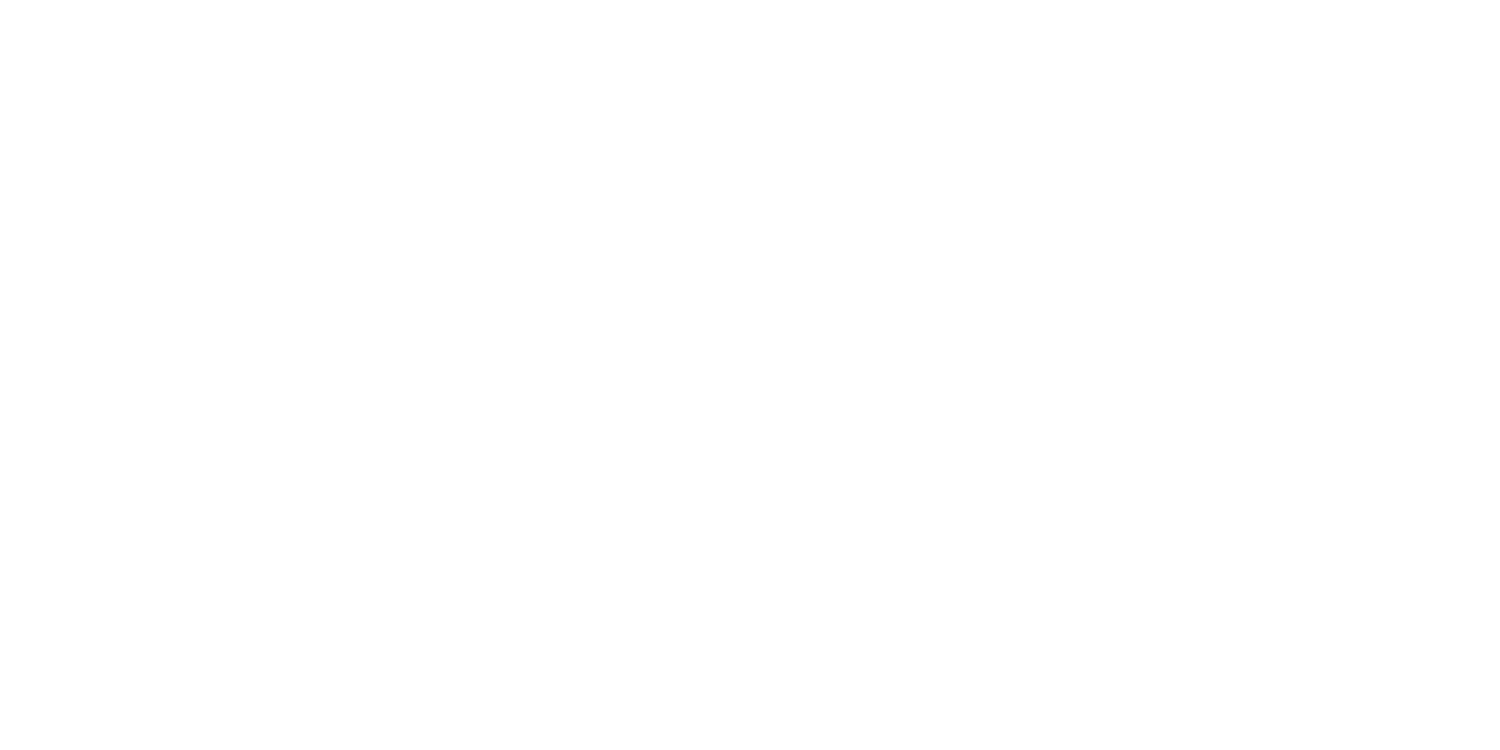

Text(0.5,1,'Rating and Limit')

In [5]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.scatter(ads['TV'], ads['radio'], alpha = 0.3);
plt.title("Television and Radio")

plt.subplot(1, 2, 2)
plt.scatter(credit['Rating'], credit['Limit'], alpha = 0.3);
plt.title("Rating and Limit")

### Collinearity Example

The `longley` dataset available through the `statsmodels` dataset package is another example of a highly collinear dataset.  Here, we are interested in determining the regression predicting the percent employed.

In [6]:
import statsmodels as sm

In [7]:
longley = sm.datasets.get_rdataset('longley')

In [8]:
longley.data.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [9]:
print(longley.__doc__)

+---------+-----------------+
| longley | R Documentation |
+---------+-----------------+

Longley's Economic Regression Data
----------------------------------

Description
~~~~~~~~~~~

A macroeconomic data set which provides a well-known example for a
highly collinear regression.

Usage
~~~~~

::

    longley

Format
~~~~~~

A data frame with 7 economical variables, observed yearly from 1947 to
1962 (*n=16*).

``GNP.deflator``
    GNP implicit price deflator (*1954=100*)

``GNP``
    Gross National Product.

``Unemployed``
    number of unemployed.

``Armed.Forces``
    number of people in the armed forces.

``Population``
    ‘noninstitutionalized’ population *≥* 14 years of age.

``Year``
    the year (time).

``Employed``
    number of people employed.

The regression ``lm(Employed ~ .)`` is known to be highly collinear.

Source
~~~~~~

J. W. Longley (1967) An appraisal of least-squares programs from the
point of view of the user. *Journal of the American Statistical
Association* 

In [10]:
long_data = longley.data

In [11]:
long_data.columns

Index(['GNP.deflator', 'GNP', 'Unemployed', 'Armed.Forces', 'Population',
       'Year', 'Employed'],
      dtype='object')

In [12]:
long_data.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [13]:
corr_mat = long_data.corr()

<IPython.core.display.Javascript object>


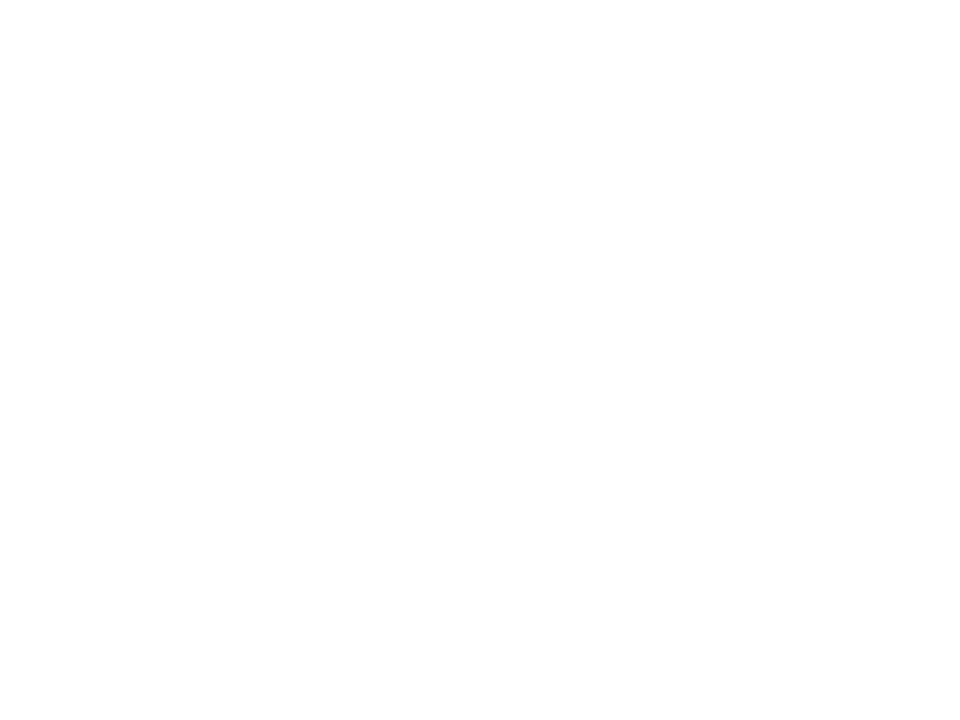

In [14]:
plt.figure()
sns.heatmap(corr_mat)

<IPython.core.display.Javascript object>


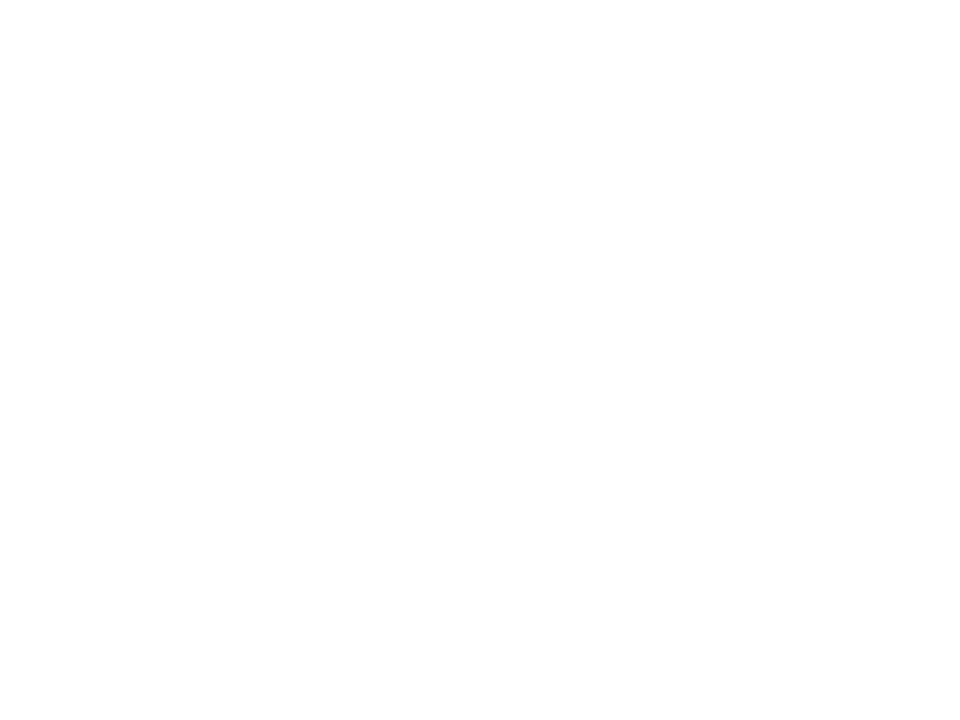

In [15]:
scatter_matrix(long_data);

### Problem

Return to your example dataset in the `Credit` example.  Remove any features you believe are highly correlated and refit your model.  Discuss performance.

### Feature Engineering and Cleaning


We want to return to our Housing example and consider how to use some of `scikitlearn`'s functionality to deal with missing values.  We want to determine the correct way of dealing with these one by one, and use some of what we know about the data to inform these decisions.  If we have objects that are missing values, we can either exclude the observations, or encode the missing values using some kind of numerical value.  


In [16]:
ames = pd.read_csv('data/ames_housing.csv')

In [17]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [19]:
ames['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [20]:
ames['Alley'] = ames['Alley'].fillna("None")

In [21]:
ames['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [22]:
ames['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [23]:
ames['FireplaceQu'] = ames['FireplaceQu'].fillna("None")

In [24]:
ames['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [25]:
ames['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

Note the existence of a number of ordinal data points.  We can encode these to follow the data dictionary. https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt

In [26]:
ames = ames.replace({"BsmtCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}})

In [27]:
ames['BsmtCond'].value_counts()

3.0    1311
4.0      65
2.0      45
1.0       2
Name: BsmtCond, dtype: int64

In [28]:
ames = ames.replace({"BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [29]:
ames['BsmtQual'].value_counts()

3.0    649
4.0    618
5.0    121
2.0     35
Name: BsmtQual, dtype: int64

**PROBLEMS**

Continue to code a few more columns and make sure to replace any `na` values in at least:

- `OverallQual`
- `OverallCond`
- `GarageQual`
- `GarageCond`
- `PoolArea`
- `PoolQC`

In [30]:
ames = ames.replace({"BsmtQual" : {1: "isntgood"}})

In [31]:
ames['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

### Adding New Features

We can create many new features to help improve our models performance.  For example, any of the measures that have multiple categories could be combined.  Take `Overall`, `Garage`, and `Pool` for example.  We can create combinations of the subcolumns as follows.

In [32]:
ames['BasementOverall'] = ames['BsmtCond'] * ames['BsmtQual']

**PROBLEMS**


Continue to add additional features that combine other existing ones in a sensible way.  Here are a few additional ideas:

```python
ames['OverallGrade'] = ames['OverallQual'] * ames['OverallCond']
ames['GarageOverall'] = ames['GarageQual'] * ames['GarageCond']
ames['PoolOverall'] = ames['PoolArea'] * ames['PoolQC']
```

Be sure you've coded these as numeric vectors before creating columns based on arithmetic involving them.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 4)

### Scikitlearn Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
ads['TVradio'] = ads['TV'] * ads['radio']

In [36]:
ads_X = ads.drop(['sales', 'newspaper'], axis = 1)

In [37]:
ads_label = ads['sales'].copy()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(ads_X, ads_label)

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lm.coef_

array([0.02042298, 0.03613204, 0.0010346 ])

In [42]:
lm.intercept_

6.551416474997474

In [43]:
lm.score(X_train, y_train)

0.9662316241220676

In [44]:
lm.score(X_test, y_test)

0.972173052860182

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
predictions = lm.predict(X_test)

In [47]:
predictions[:8]

array([10.52277744,  9.1298606 , 12.99907101, 22.56412737,  9.51634212,
        8.20387302, 18.72353018,  9.23962051])

In [48]:
y_test[:8]

191    10.8
197     9.7
26     12.0
56     23.7
137     9.5
118     9.4
194    19.6
76      8.7
Name: sales, dtype: float64

In [49]:
mse = mean_squared_error(y_test, predictions)

In [50]:
rmse = np.sqrt(mse)

In [51]:
print("MSE: ", mse, "\nRMSE: ", rmse)

MSE:  0.6991719709820774 
RMSE:  0.8361650381246979


**PROBLEM**

Using the `sklearn` implementation of `LinearRegression()`, create a test and train set from your housing data.  To begin, fit a linear model on the **Logarithm** of the sales column with the `GrLivArea` feature.  Use this as your baseline to compare your transformations to.  

Include the transformations from above into a second linear model and try it out on the test set. Did the performance improve with your adjustments and transformations? 

Add polynomial features into the mix and see if you can get better improvement still.

In [52]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [54]:
ames = pd.read_csv('data/ames_housing.csv')

In [55]:
lm = LinearRegression()
X = ames['GrLivArea']
y = ames['SalePrice']

In [56]:
lm.fit_intercept

True

In [57]:
lm.normalize

False

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split('GrLivArea', 'SalePrice')

In [60]:
lm = LinearRegression()

In [61]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>


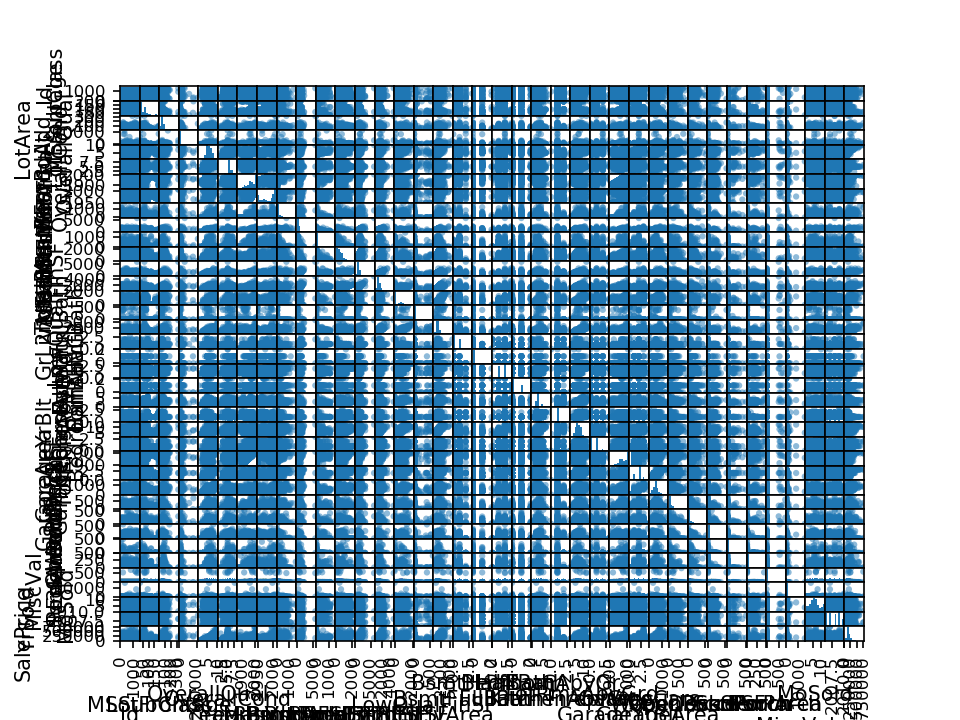

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A21BF28208>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

In [77]:
from pandas.plotting import scatter_matrix
scatter_matrix(ames)

In [65]:
np.polyfit(X,y,1,rcond=None)

array([  107.13035897, 18569.02585649])

In [66]:
ames['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
          ..
64500      1
326000     1
277500     1
259000     1
254900     1
131400     1
181134     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
317000     1
154500     1
52000      1
107400     1
218000     1
104000     1
68500      1
94000      1
466500     1
410000     1
437154     1
219210     1
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

In [67]:
ames['GrLivArea'].value_counts()

864     22
1040    14
894     11
848     10
1456    10
912      9
1200     9
816      8
1092     8
1344     7
1728     7
987      7
1056     6
1224     6
1768     6
1494     6
1484     6
630      6
1144     5
1314     5
960      5
1252     5
1710     5
1392     5
988      5
990      5
1656     5
1218     5
1302     5
882      4
        ..
1357     1
1347     1
1453     1
1346     1
1343     1
1342     1
1338     1
1334     1
1327     1
1322     1
1385     1
1386     1
1387     1
1391     1
1446     1
3493     1
1436     1
1434     1
1429     1
1425     1
1411     1
1406     1
1405     1
1402     1
1400     1
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 4)

In [74]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [75]:
X = np.arange(8).reshape(4, 2)
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  6.,  7., 36., 42., 49.]])

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])
X = np.arange(5)
y = 3 - 2 * X + X ** 2 - X ** 3
model = model.fit(X[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

In [115]:
plt.plot(X,y)

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [119]:
poly = pd.DataFrame({'x': [i  for i in range(10)],
                    'y': [i**2 + np.random.normal()for i in range(10)]})

In [120]:
poly

,x,y
0,0,0.625231
1,1,-0.274678
2,2,3.207920
3,3,9.173123
4,4,15.016675
5,5,25.774417
6,6,37.741943
7,7,48.886501
8,8,64.680029
9,9,80.794244


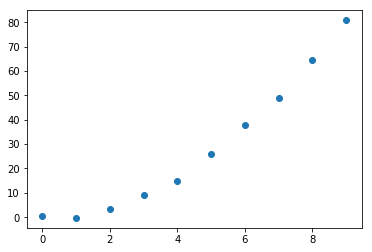

In [121]:
plt.scatter(poly.x, poly.y)

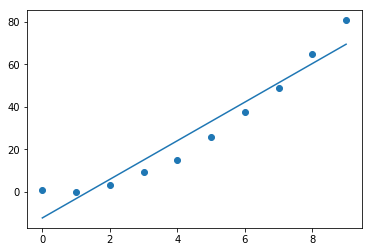

In [122]:
lr = LinearRegression()
lr.fit(poly.x.values.reshape(-1,1), poly.y)
pred = lr.predict(poly.x.values.reshape(-1,1))
plt.scatter(poly.x, poly.y)
plt.plot(poly.x, pred)

In [123]:
poly['x_squared'] = poly.x * poly.x

In [124]:
lr = LinearRegression()
lr.fit(poly[['x', 'x_squared']], poly.y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
lr.coef_

array([0.18858264, 0.98986198])

In [126]:
lr.intercept_

-0.4971478847373305

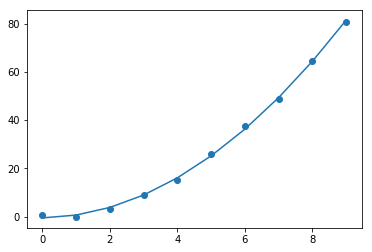

In [127]:
plt.scatter(poly.x, poly.y)
plt.plot(poly.x, lr.predict(poly[['x', 'x_squared']]) )

In [128]:
PolynomialFeatures(degree=2).fit_transform(poly.x.values.reshape(-1,1))

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])